In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['retina']  # or svg
%matplotlib inline

plt.rcParams['figure.figsize'] = (9, 6)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

from sklearn.metrics import accuracy_score
import xgboost as xgb

In [17]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import KFold

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

In [59]:
from sklearn.model_selection import GridSearchCV

In [76]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [3]:
import pickle

In [4]:
X_train = pickle.load(open( "X_train.p", "rb" ) )

In [5]:
X_train.shape

(472430, 221)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472430 entries, 157763 to 107770
Columns: 221 entries, card6_charge card to addr1_transAmt
dtypes: float64(208), int64(8), object(5)
memory usage: 800.2+ MB


In [7]:
object_col = list(X_train.select_dtypes(['object'])) 

In [8]:
print("pre-drop: ",X_train.shape)
X_train.drop(columns = object_col,inplace=True)
print("post-drop: ",X_train.shape)

pre-drop:  (472430, 221)
post-drop:  (472430, 216)


In [9]:
X_test = pickle.load(open( "X_test.p", "rb" ) )

In [10]:
print("pre-drop: ",X_test.shape)
X_test.drop(columns = object_col,inplace=True)
print("post-drop: ",X_test.shape)

pre-drop:  (118108, 221)
post-drop:  (118108, 216)


In [11]:
y_train = pickle.load(open( "y_train.p", "rb" ) )

In [12]:
y_train.shape

(472430, 1)

In [13]:
y_test = pickle.load(open( "y_test.p", "rb" ) )

In [14]:
y_test.shape

(118108, 1)

In [ ]:
###########################
## Cross Validation Prep ##
###########################

In [21]:
combined_df = pickle.load(open( "combined_df.p", "rb" ))

In [22]:
X = combined_df.loc[ : , combined_df.columns != 'isFraud'] 

In [34]:
print("pre-drop: ",X.shape)
X.drop(columns = object_col,inplace=True)
print("post-drop: ",X.shape)

pre-drop:  (590538, 221)
post-drop:  (590538, 216)


/Users/arcarter/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
y = combined_df.loc[ : , combined_df.columns == 'isFraud'] 

In [25]:
y.shape

(590538, 1)

In [ ]:
###########################
## XGBoost CV, No Weighting ##
###########################

In [26]:
xgbc = XGBClassifier()

In [27]:
print(xgbc)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


In [36]:
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(xgbc, X, y.values.ravel(), cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[18:33:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:35:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:40:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [ ]:
##################################
## Fit on training and hold out ##
##################################

In [38]:
xgbc.fit(X_train, y_train)

[19:57:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
ypred = xgbc.predict(X_test)
cm = confusion_matrix(y_test,ypred) 
print(cm)

[[113837    207]
 [  2076   1988]]


In [52]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

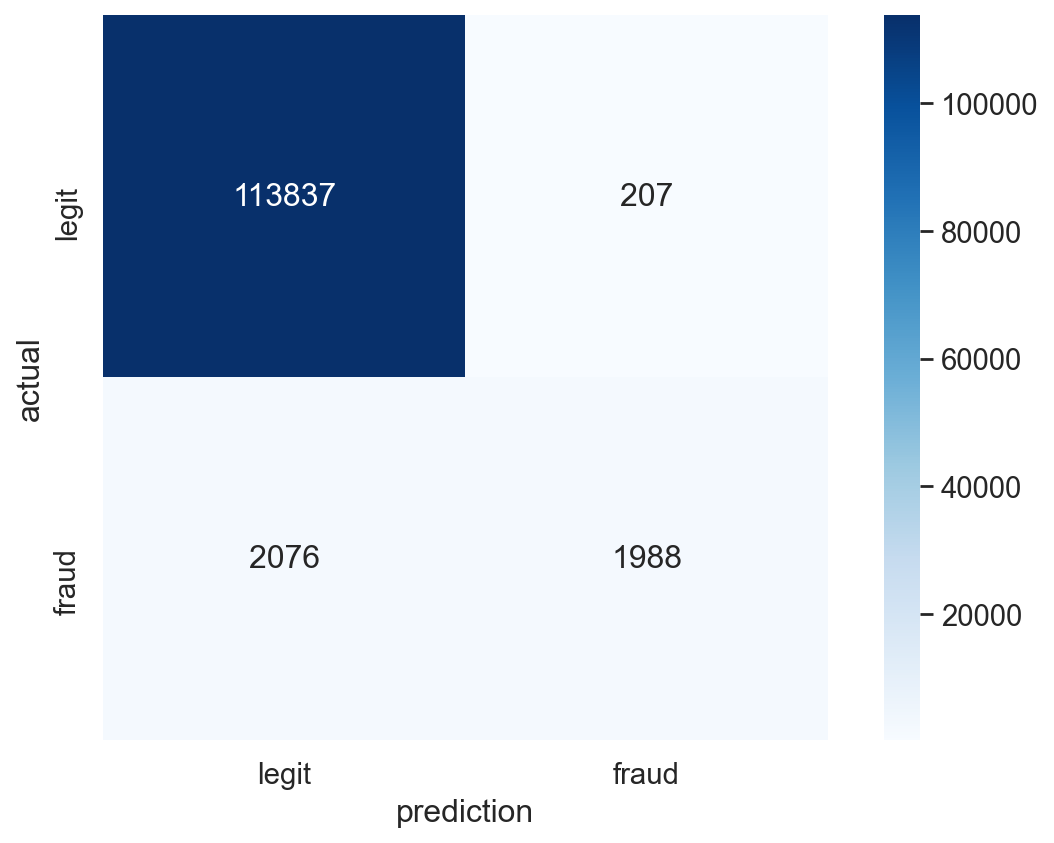

In [53]:
make_confusion_matrix(xgbc)

In [54]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(xgbc, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [ ]:
from IPython.display import Image
Image('normal_distribution.png')

In [113]:
y_preds = xgbc.predict_proba(X_test)

In [114]:
preds = y_preds[:,1]
preds[:10]

array([0.00250179, 0.00338273, 0.01222726, 0.00568502, 0.00538304,
       0.01332522, 0.00401542, 0.01754912, 0.00295083, 0.87817454],
      dtype=float32)

In [115]:
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
auc_score = metrics.auc(fpr, tpr)

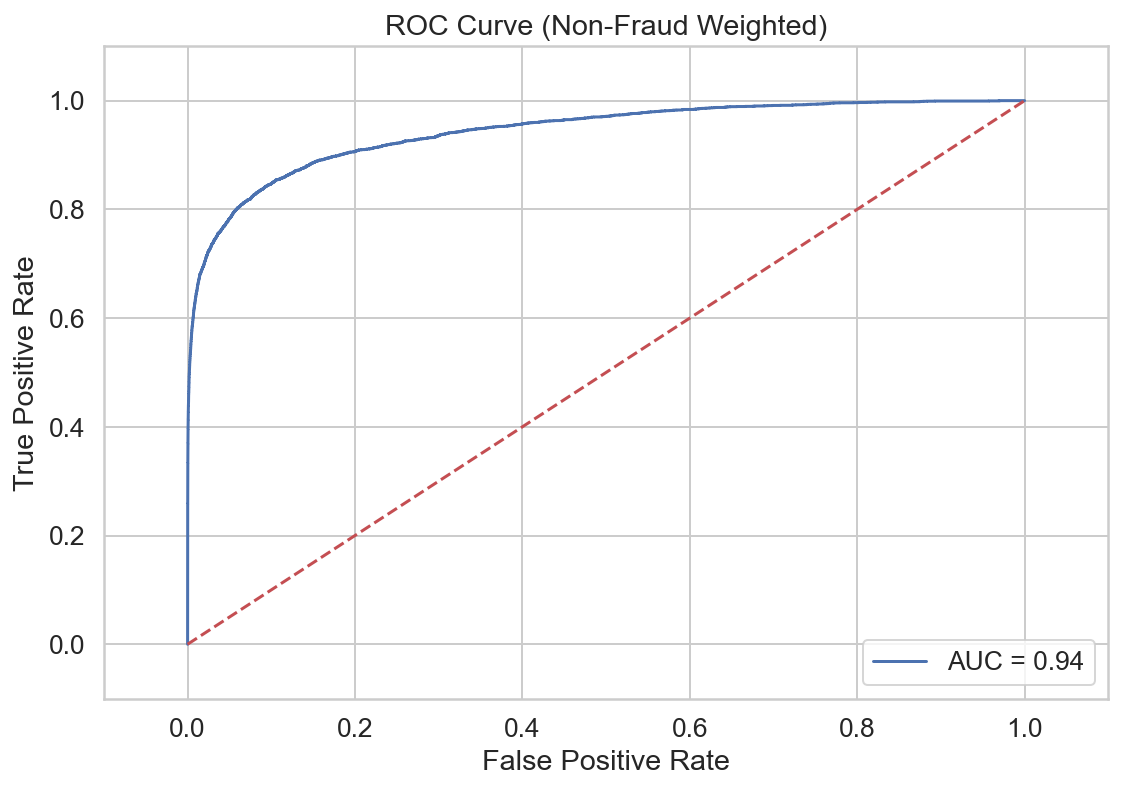

In [116]:
plt.clf()

plt.title('ROC Curve (Non-Fraud Weighted)')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

In [ ]:
##################################
## Identify Different Weights   ##
##################################

In [62]:
# define grid
weights = [10, 33, 99]
param_grid = dict(scale_pos_weight=weights)

In [64]:
# define evaluation procedure
cv = KFold(n_splits=4, shuffle=True)
# define grid search
grid = GridSearchCV(estimator=xgbc, param_grid=param_grid, cv=cv, scoring='precision')

In [66]:
grid_result = grid.fit(X_train, y_train.values.ravel())
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[22:32:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:33:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:35:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:37:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [ ]:
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
################################
## Try with Different Weights ##
################################

In [68]:
xgbc2 = XGBClassifier(scale_pos_weight=10)

In [69]:
xgbc2.fit(X_train, y_train)

[23:24:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
interactive(lambda threshold: make_confusion_matrix(xgbc2, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [71]:
y_preds2 = xgbc2.predict_proba(X_test)

In [72]:
preds2 = y_preds2[:,1]
preds2[:10]

array([0.02327314, 0.02157615, 0.11734491, 0.02339742, 0.10427998,
       0.07896141, 0.0361197 , 0.06349013, 0.01652503, 0.98905855],
      dtype=float32)

In [77]:
# using the default threshold of 0.5, which is what vanilla predict does
y_predict = xgbc2.predict(X_test)
for i in range(10,91,10):
    print("Threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.5250,   Recall: 0.7281


In [95]:
y_predict = (xgbc.predict_proba(X_test)[:,1] > 0.06)
print("Threshold of 0.06:")
print("Precision: {:6.2f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.06:
Precision:   0.34,   Recall: 0.7945


In [106]:
bold_start = '\033[1m'
bold_end   = '\033[0m'
for i in np.arange(0.1,1,0.1):
    y_predict = (xgbc.predict_proba(X_test)[:,1] > i)
    print(bold_start,"Threshold of {:2.2f}".format(i),bold_end)
    print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
    print('-------------------------------------')

 Threshold of 0.10 
Precision: 0.4881,   Recall: 0.7293
-------------------------------------
 Threshold of 0.20 
Precision: 0.6992,   Recall: 0.6390
-------------------------------------
 Threshold of 0.30 
Precision: 0.8055,   Recall: 0.5738
-------------------------------------
 Threshold of 0.40 
Precision: 0.8653,   Recall: 0.5266
-------------------------------------
 Threshold of 0.50 
Precision: 0.9057,   Recall: 0.4892
-------------------------------------
 Threshold of 0.60 
Precision: 0.9324,   Recall: 0.4481
-------------------------------------
 Threshold of 0.70 
Precision: 0.9559,   Recall: 0.4104
-------------------------------------
 Threshold of 0.80 
Precision: 0.9718,   Recall: 0.3568
-------------------------------------
 Threshold of 0.90 
Precision: 0.9799,   Recall: 0.2761
-------------------------------------


In [134]:
print(xgbc)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [135]:
print(xgbc2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [136]:
for i in np.arange(0.1,1,0.1):
    y_predict = (xgbc.predict_proba(X_test)[:,1] > i)
    print(bold_start,"Threshold of {:2.2f}".format(i),bold_end)
    print("Precision: {:6.4f},   Recall: {:6.4f}, Log-loss: {:6.4f}, F! Score: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict),log_loss(y_test, y_predict),f1_score(y_test, y_predict)
                                                                                              ))

    print('-------------------------------------')

 Threshold of 0.10 
Precision: 0.4881,   Recall: 0.7293, Log-loss: 1.2309, F! Score: 0.5848
-------------------------------------
 Threshold of 0.20 
Precision: 0.6992,   Recall: 0.6390, Log-loss: 0.7557, F! Score: 0.6678
-------------------------------------
 Threshold of 0.30 
Precision: 0.8055,   Recall: 0.5738, Log-loss: 0.6711, F! Score: 0.6702
-------------------------------------
 Threshold of 0.40 
Precision: 0.8653,   Recall: 0.5266, Log-loss: 0.6600, F! Score: 0.6547
-------------------------------------
 Threshold of 0.50 
Precision: 0.9057,   Recall: 0.4892, Log-loss: 0.6676, F! Score: 0.6352
-------------------------------------
 Threshold of 0.60 
Precision: 0.9324,   Recall: 0.4481, Log-loss: 0.6945, F! Score: 0.6053
-------------------------------------
 Threshold of 0.70 
Precision: 0.9559,   Recall: 0.4104, Log-loss: 0.7232, F! Score: 0.5743
-------------------------------------
 Threshold of 0.80 
Precision: 0.9718,   Recall: 0.3568, Log-loss: 0.7767, F! Score: 0.522

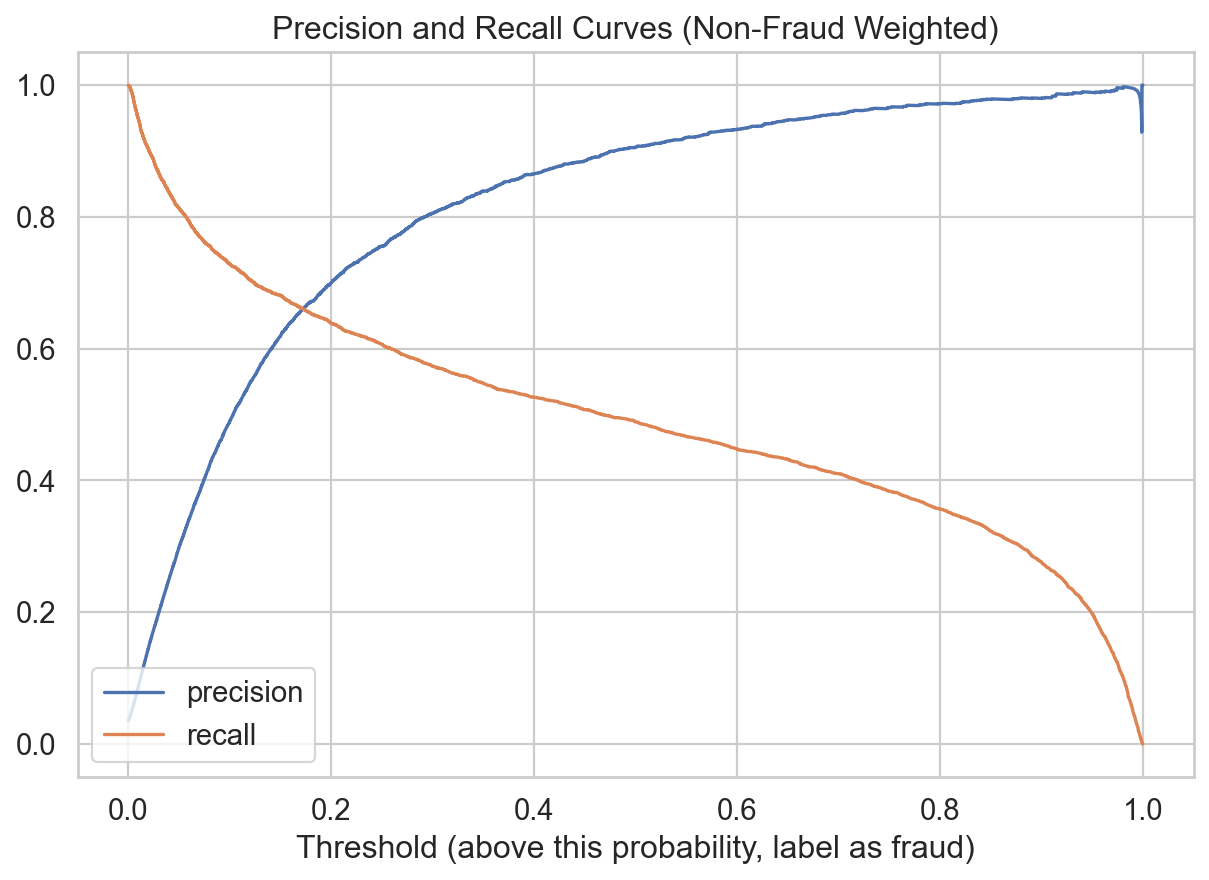

In [110]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, xgbc.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves (Non-Fraud Weighted)');

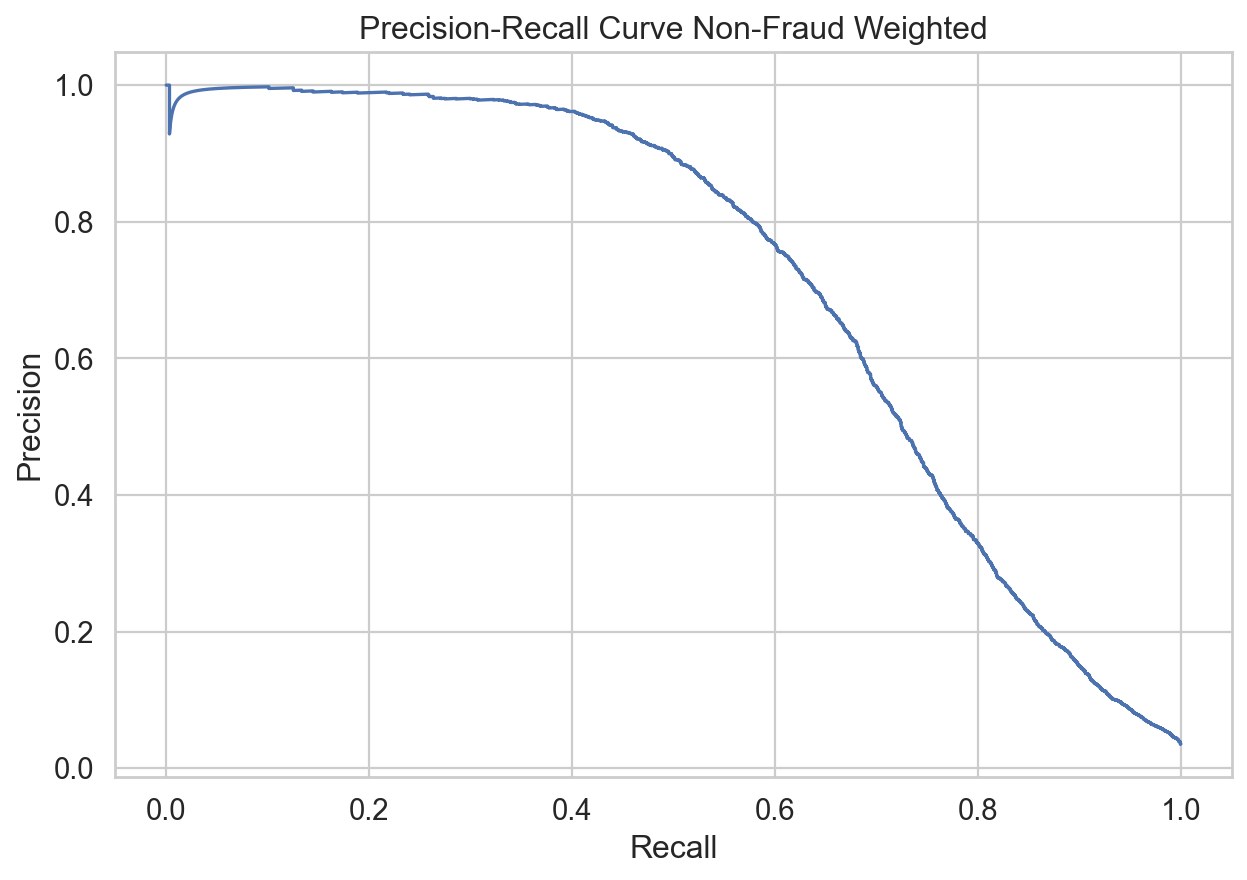

In [126]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Non-Fraud Weighted");

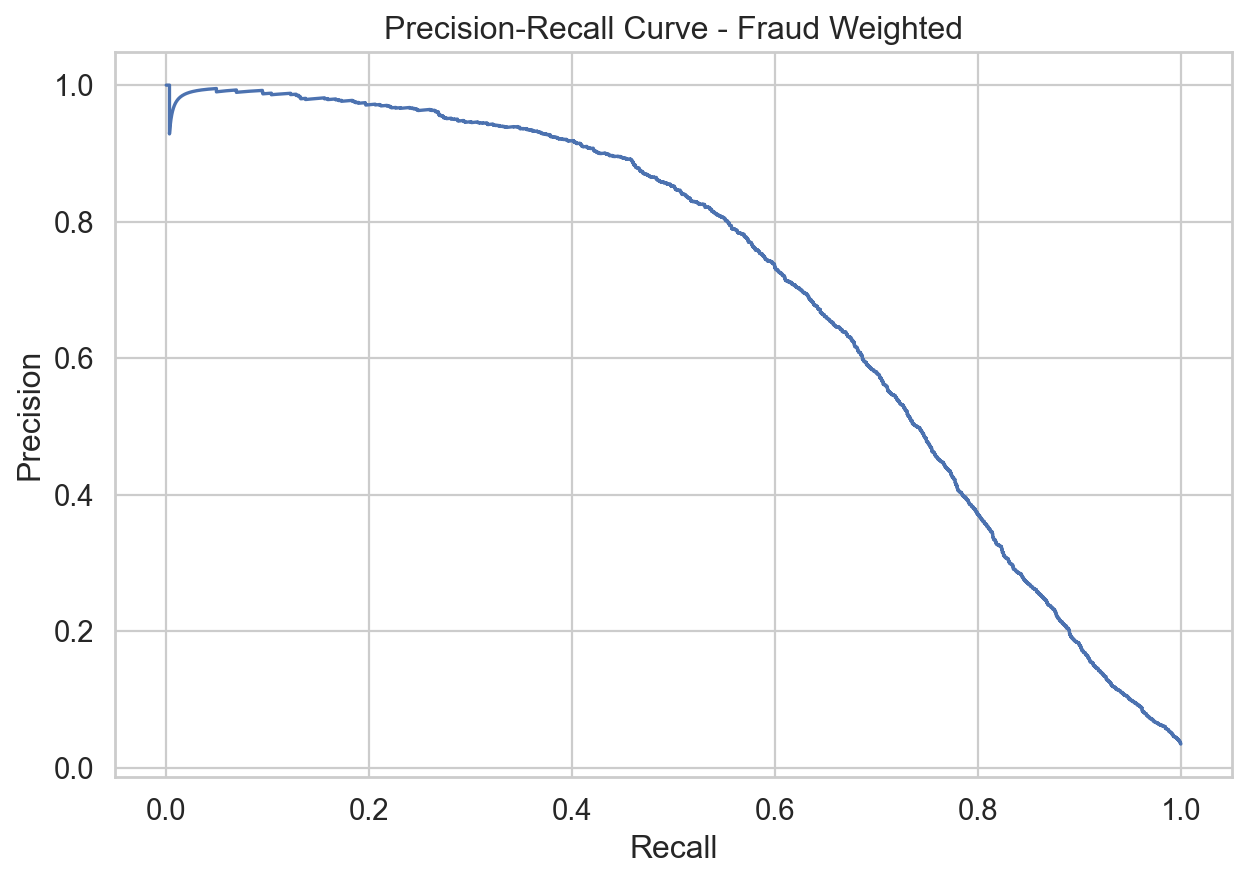

In [127]:
plt.figure(dpi=80)
plt.plot(recall_curve2[1:], precision_curve2[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Fraud Weighted");

In [128]:
from sklearn.metrics import log_loss

In [130]:
bold_start = '\033[1m'
bold_end   = '\033[0m'
for i in np.arange(0.1,1,0.1):
    y_predict = (xgbc2.predict_proba(X_test)[:,1] > i)
    print(bold_start,"Threshold of {:2.2f}".format(i),bold_end)
    print("Threshold of {:2.2f}, Precision: {:6.4f},   Recall: {:6.4f}".format(,precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
    print("Log-loss: {:6.4f} ".format(log_loss(y_test, y_predict)))
    print(f1_score(y_test, y_predict))
    print('-------------------------------------')

 Threshold of 0.10 
Precision: 0.1114,   Recall: 0.9407
Log-loss: 8.9885, 
-------------------------------------
 Threshold of 0.20 
Precision: 0.2080,   Recall: 0.8861
Log-loss: 4.1456, 
-------------------------------------
 Threshold of 0.30 
Precision: 0.3065,   Recall: 0.8292
Log-loss: 2.4331, 
-------------------------------------
 Threshold of 0.40 
Precision: 0.4111,   Recall: 0.7793
Log-loss: 1.5891, 
-------------------------------------
 Threshold of 0.50 
Precision: 0.5250,   Recall: 0.7281
Log-loss: 1.1060, 
-------------------------------------
 Threshold of 0.60 
Precision: 0.6283,   Recall: 0.6747
Log-loss: 0.8609, 
-------------------------------------
 Threshold of 0.70 
Precision: 0.7217,   Recall: 0.6075
Log-loss: 0.7448, 
-------------------------------------
 Threshold of 0.80 
Precision: 0.8149,   Recall: 0.5394
Log-loss: 0.6931, 
-------------------------------------
 Threshold of 0.90 
Precision: 0.8999,   Recall: 0.4269
Log-loss: 0.7375, 
---------------------

In [132]:
for i in np.arange(0.1,1,0.1):
    y_predict = (xgbc2.predict_proba(X_test)[:,1] > i)
    print(bold_start,"Threshold of {:2.2f}".format(i),bold_end)
    print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
    print("Log-loss: {:6.4f}".format(log_loss(y_test, y_predict)))
    print("F! Score: {:6.4f}".format(f1_score(y_test, y_predict)))
    print('-------------------------------------')

 Threshold of 0.10 
Precision: 0.1114,   Recall: 0.9407
Log-loss: 8.9885
F! Score: 0.1992
-------------------------------------
 Threshold of 0.20 
Precision: 0.2080,   Recall: 0.8861
Log-loss: 4.1456
F! Score: 0.3369
-------------------------------------
 Threshold of 0.30 
Precision: 0.3065,   Recall: 0.8292
Log-loss: 2.4331
F! Score: 0.4475
-------------------------------------
 Threshold of 0.40 
Precision: 0.4111,   Recall: 0.7793
Log-loss: 1.5891
F! Score: 0.5382
-------------------------------------
 Threshold of 0.50 
Precision: 0.5250,   Recall: 0.7281
Log-loss: 1.1060
F! Score: 0.6101
-------------------------------------
 Threshold of 0.60 
Precision: 0.6283,   Recall: 0.6747
Log-loss: 0.8609
F! Score: 0.6507
-------------------------------------
 Threshold of 0.70 
Precision: 0.7217,   Recall: 0.6075
Log-loss: 0.7448
F! Score: 0.6597
-------------------------------------
 Threshold of 0.80 
Precision: 0.8149,   Recall: 0.5394
Log-loss: 0.6931
F! Score: 0.6491
--------------

In [133]:
for i in np.arange(0.1,1,0.1):
    y_predict = (xgbc2.predict_proba(X_test)[:,1] > i)
    print(bold_start,"Threshold of {:2.2f}".format(i),bold_end)
    print("Precision: {:6.4f},   Recall: {:6.4f}, Log-loss: {:6.4f}, F! Score: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict),log_loss(y_test, y_predict),f1_score(y_test, y_predict)
                                                                                              ))

    print('-------------------------------------')

 Threshold of 0.10 
Precision: 0.1114,   Recall: 0.9407, Log-loss: 8.9885, F! Score: 0.1992
-------------------------------------
 Threshold of 0.20 
Precision: 0.2080,   Recall: 0.8861, Log-loss: 4.1456, F! Score: 0.3369
-------------------------------------
 Threshold of 0.30 
Precision: 0.3065,   Recall: 0.8292, Log-loss: 2.4331, F! Score: 0.4475
-------------------------------------
 Threshold of 0.40 
Precision: 0.4111,   Recall: 0.7793, Log-loss: 1.5891, F! Score: 0.5382
-------------------------------------
 Threshold of 0.50 
Precision: 0.5250,   Recall: 0.7281, Log-loss: 1.1060, F! Score: 0.6101
-------------------------------------
 Threshold of 0.60 
Precision: 0.6283,   Recall: 0.6747, Log-loss: 0.8609, F! Score: 0.6507
-------------------------------------
 Threshold of 0.70 
Precision: 0.7217,   Recall: 0.6075, Log-loss: 0.7448, F! Score: 0.6597
-------------------------------------
 Threshold of 0.80 
Precision: 0.8149,   Recall: 0.5394, Log-loss: 0.6931, F! Score: 0.649

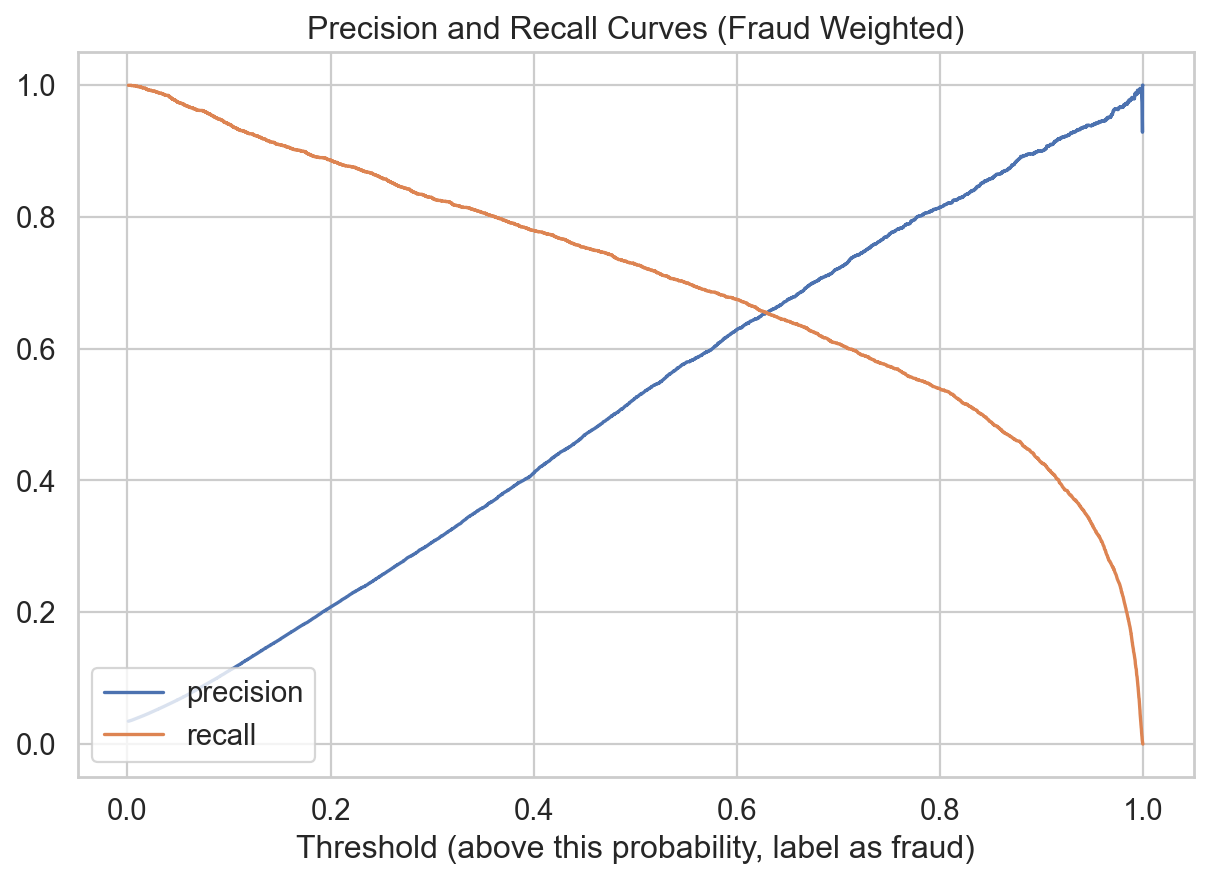

In [107]:
precision_curve2, recall_curve2, threshold_curve2 = precision_recall_curve(y_test, xgbc2.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve2, precision_curve2[1:],label='precision')
plt.plot(threshold_curve2, recall_curve2[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves (Fraud Weighted)');

In [ ]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

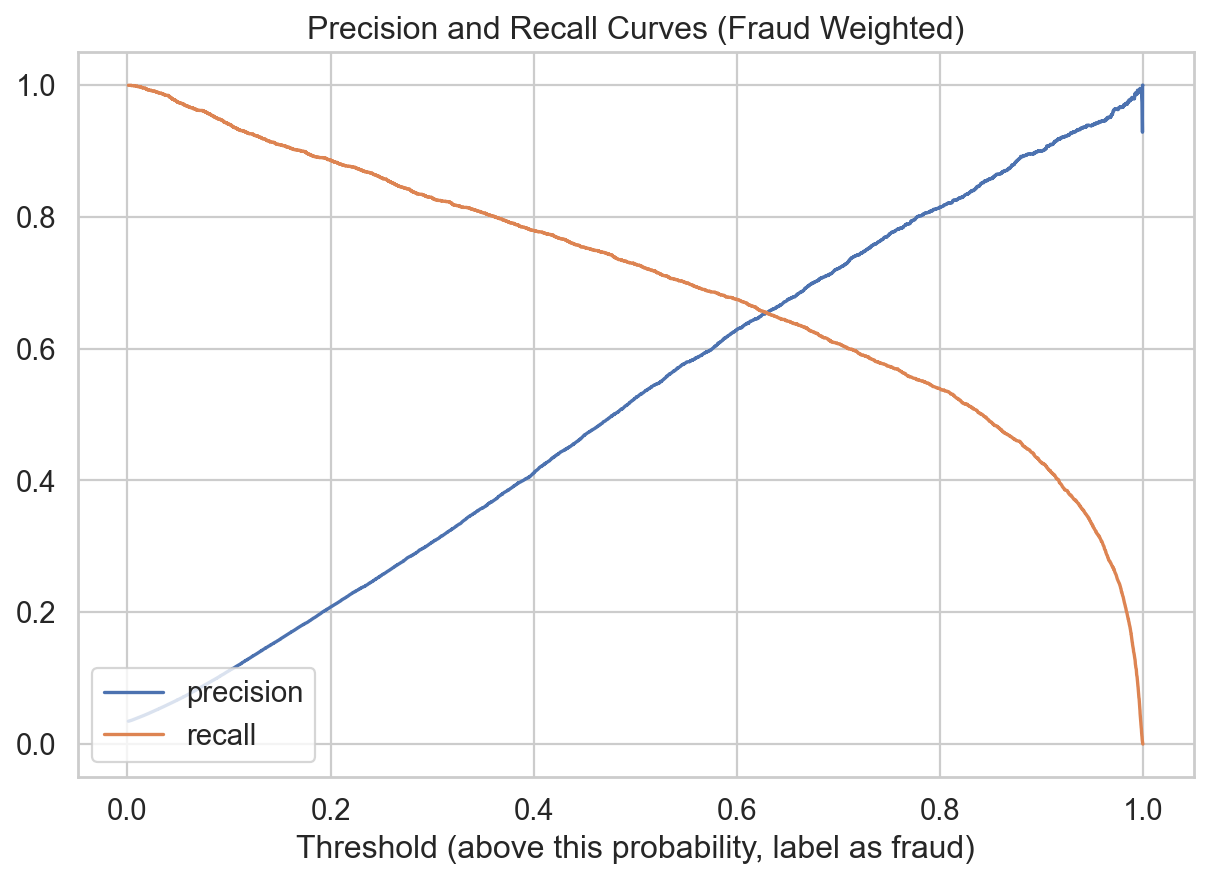

In [123]:
precision_curve2, recall_curve2, threshold_curve2 = precision_recall_curve(y_test, xgbc2.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve2, precision_curve2[1:],label='precision')
plt.plot(threshold_curve2, recall_curve2[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves (Fraud Weighted)');

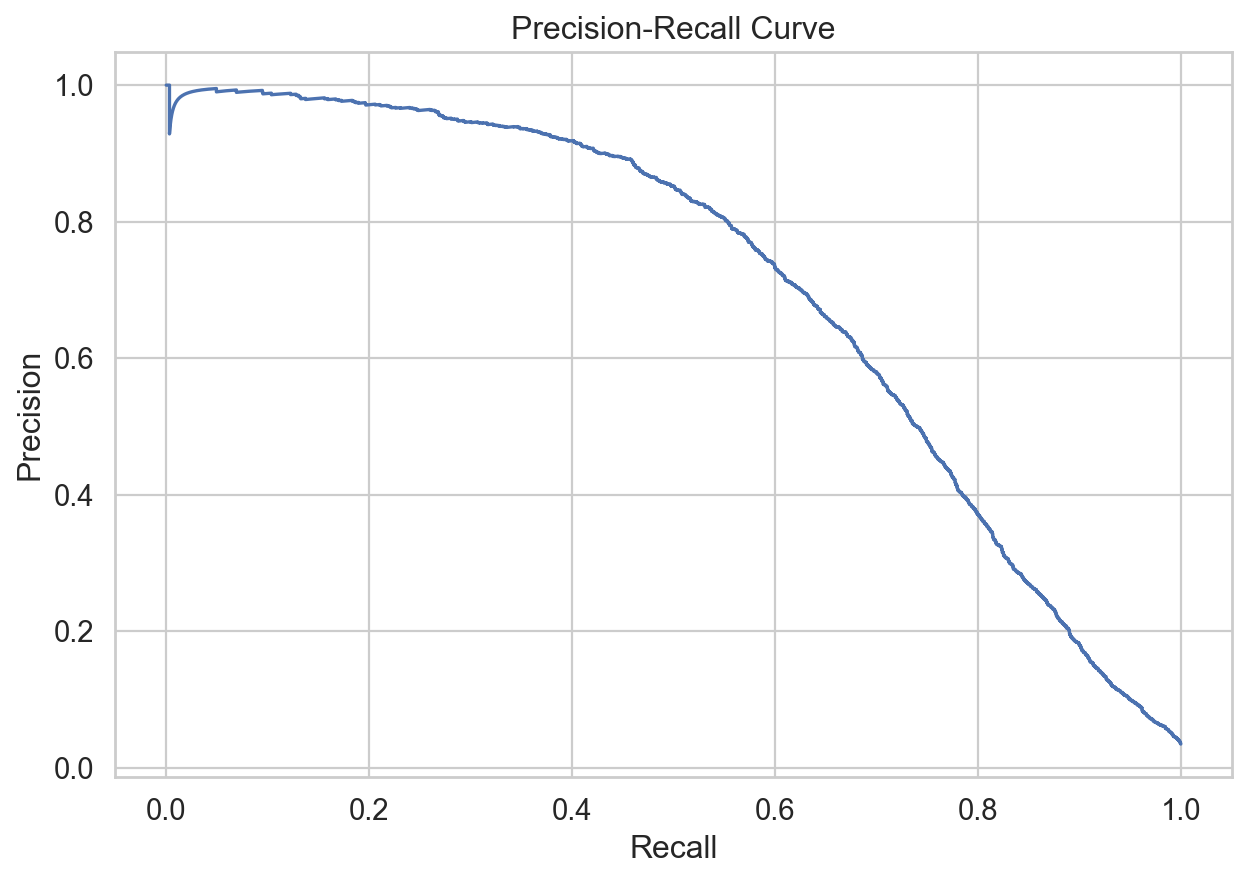

In [124]:
plt.figure(dpi=80)
plt.plot(recall_curve2[1:], precision_curve2[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [ ]:
sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);

In [89]:
print([*np.arange(0.1,1,0.1)])

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9]


In [73]:
fpr2, tpr2, _ = metrics.roc_curve(y_test, preds2)
auc_score = metrics.auc(fpr2, tpr2)

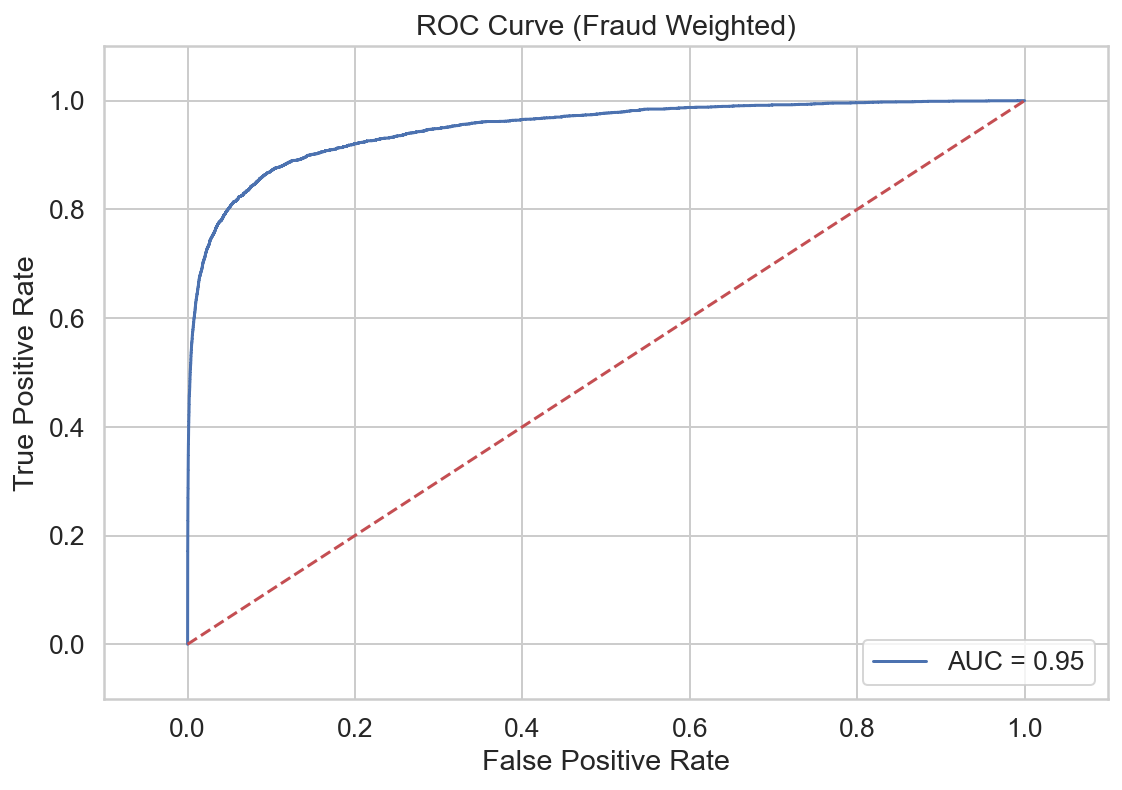

In [112]:
plt.clf()

plt.title('ROC Curve (Fraud Weighted)')
plt.plot(fpr2, tpr2, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

<AxesSubplot:title={'center':'Feature importance (Non-Weighted Fraud) - Type: Gain)'}, xlabel='F score', ylabel='Features'>

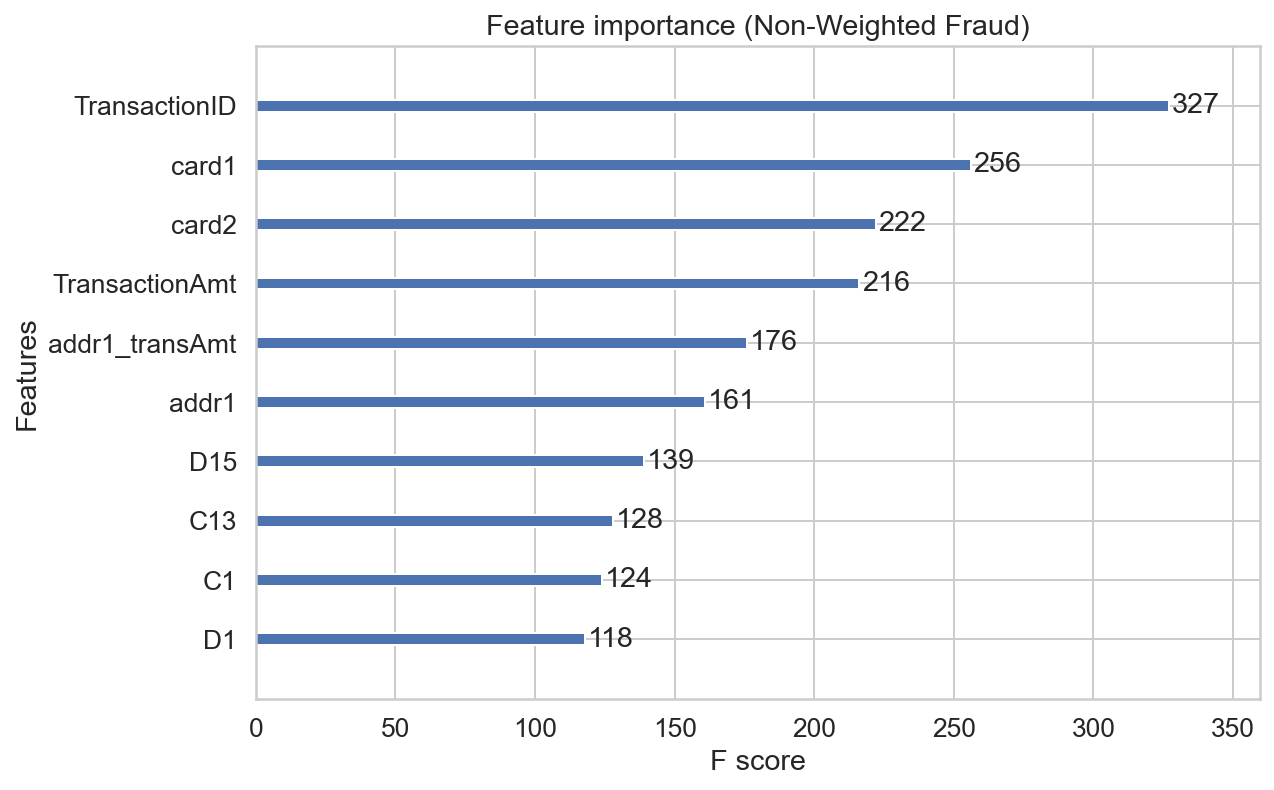

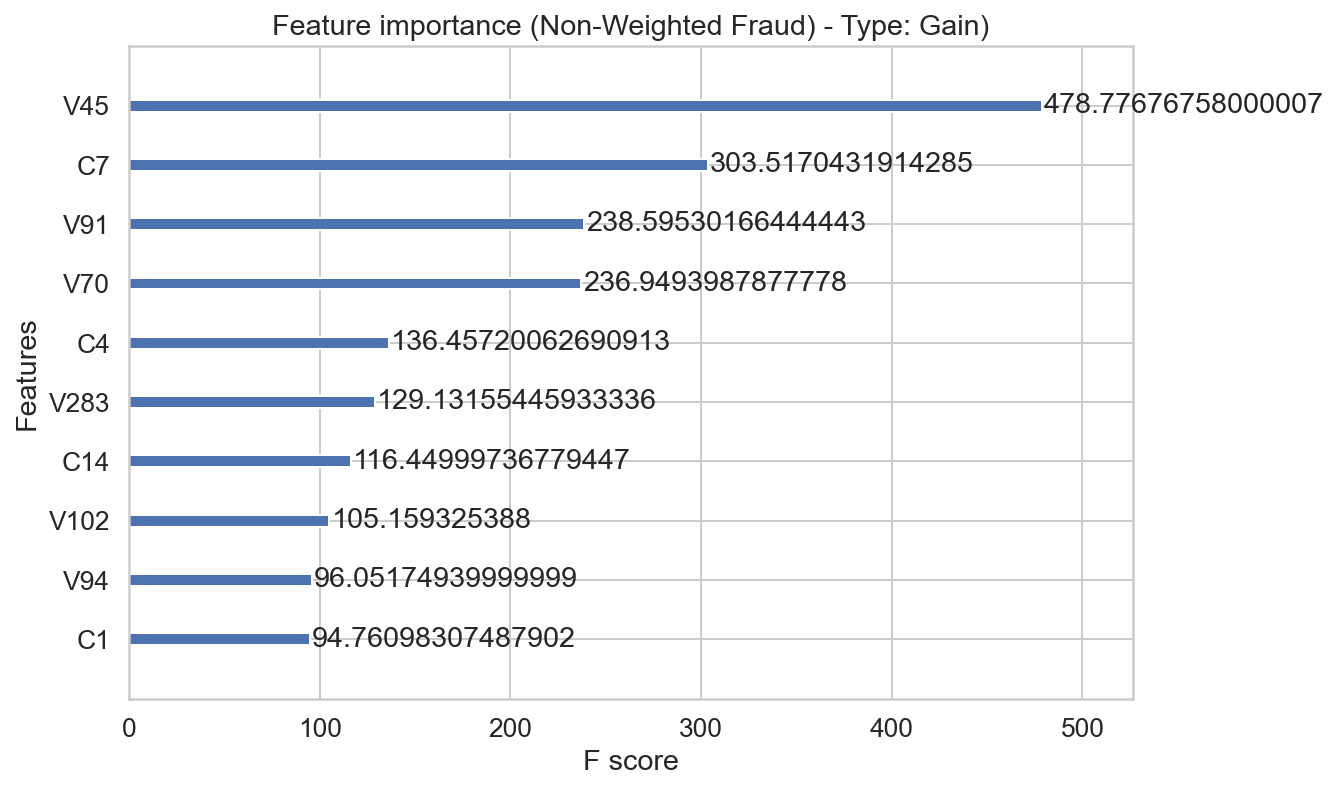

In [120]:
xgb.plot_importance(xgbc,max_num_features=10,title='Feature importance (Non-Weighted Fraud)')
xgb.plot_importance(xgbc, max_num_features=10,importance_type='gain',title='Feature importance (Non-Weighted Fraud) - Type: Gain)')

<AxesSubplot:title={'center':'Feature importance (Weighted Fraud) - Type: Gain)'}, xlabel='F score', ylabel='Features'>

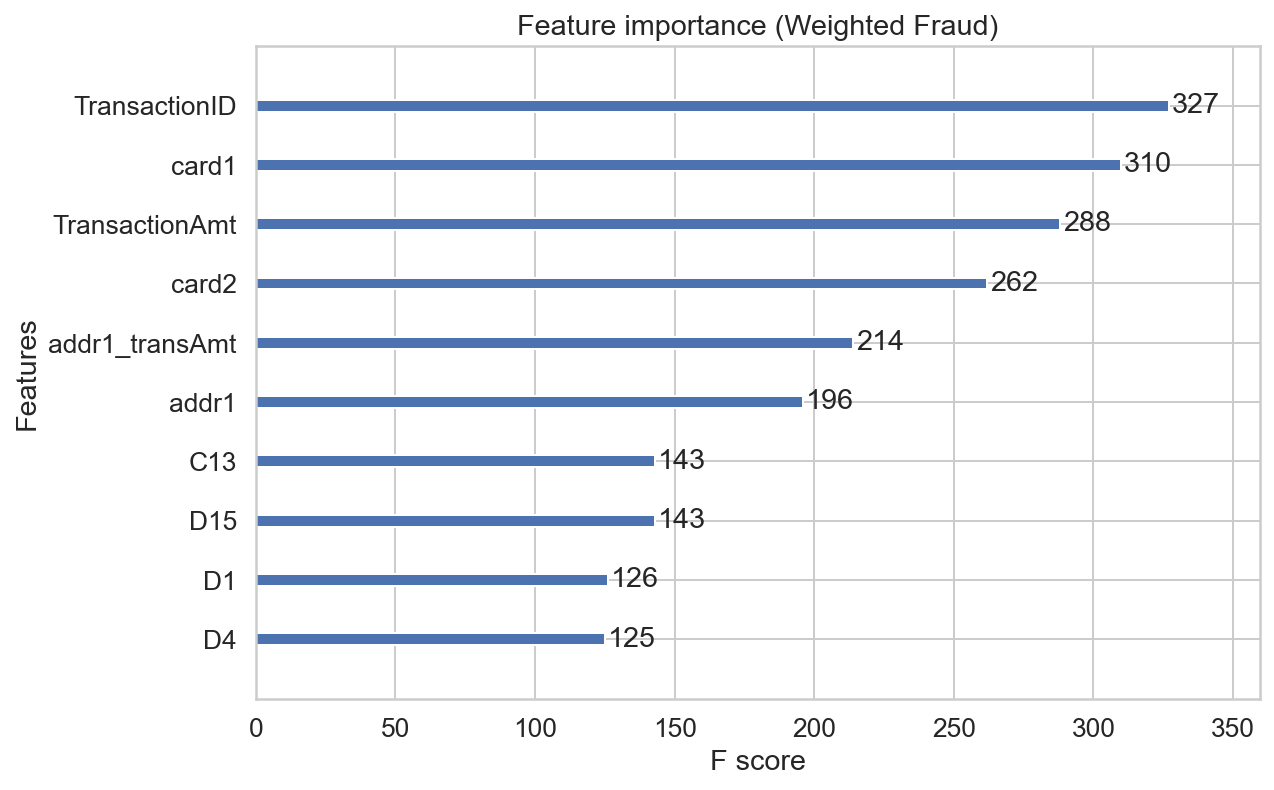

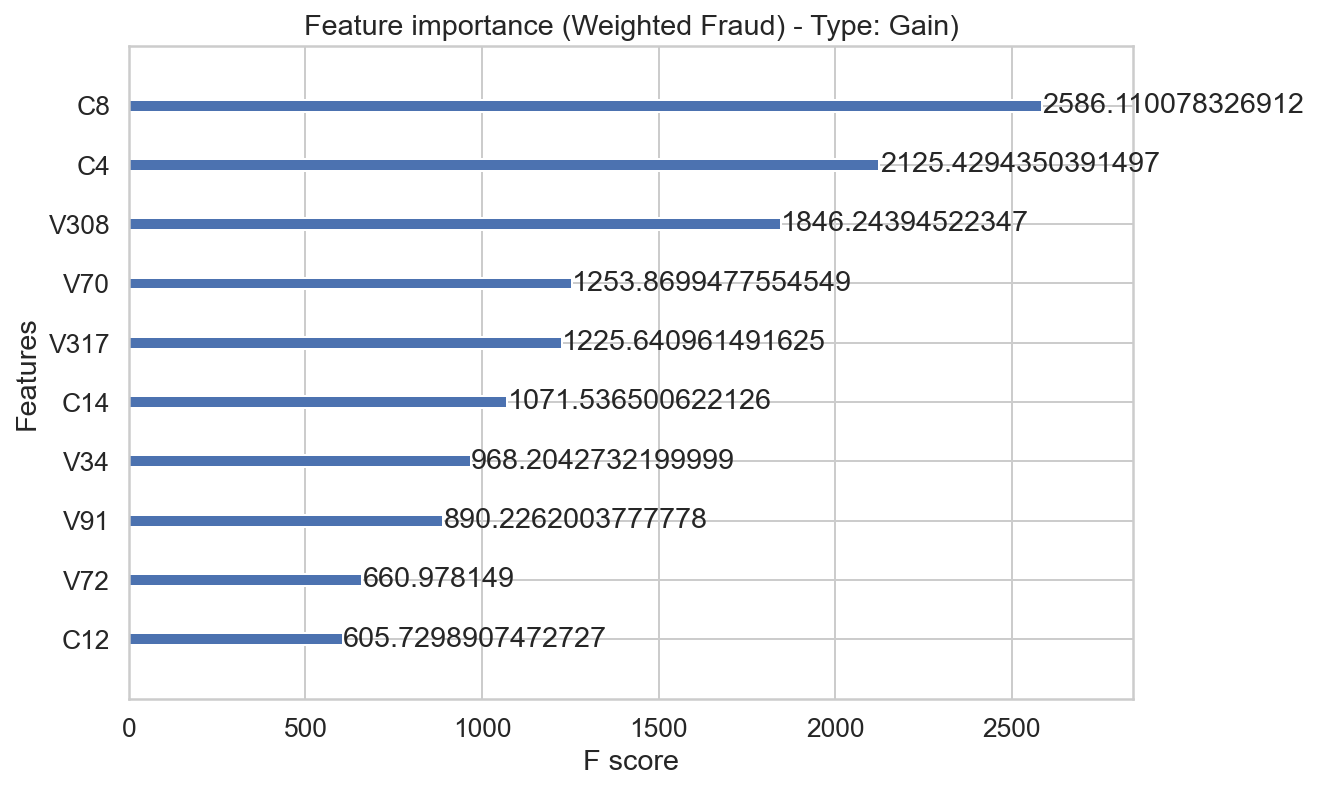

In [121]:
xgb.plot_importance(xgbc2,max_num_features=10,title='Feature importance (Weighted Fraud)')
xgb.plot_importance(xgbc2, max_num_features=10,importance_type='gain',title='Feature importance (Weighted Fraud) - Type: Gain)')

In [122]:
X_test['C8'].value_counts()

0.0       89570
1.0       21105
2.0        3158
3.0        1107
4.0         557
          ...  
2418.0        1
425.0         1
2866.0        1
822.0         1
1651.0        1
Name: C8, Length: 438, dtype: int64

In [ ]:
print cross_val_score(classifier, X_train, y_train, cv=10, scoring='precision')
print cross_val_score(classifier, X_train, y_train, cv=10, scoring='recall')